#  Deep Learning With PyTorch 11 - Softmax and Cross-Entropy

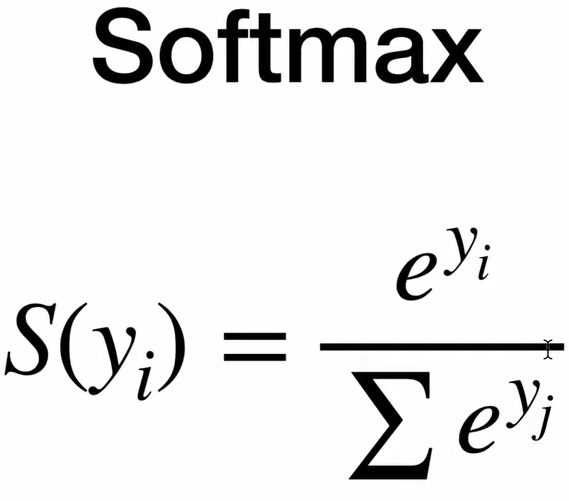
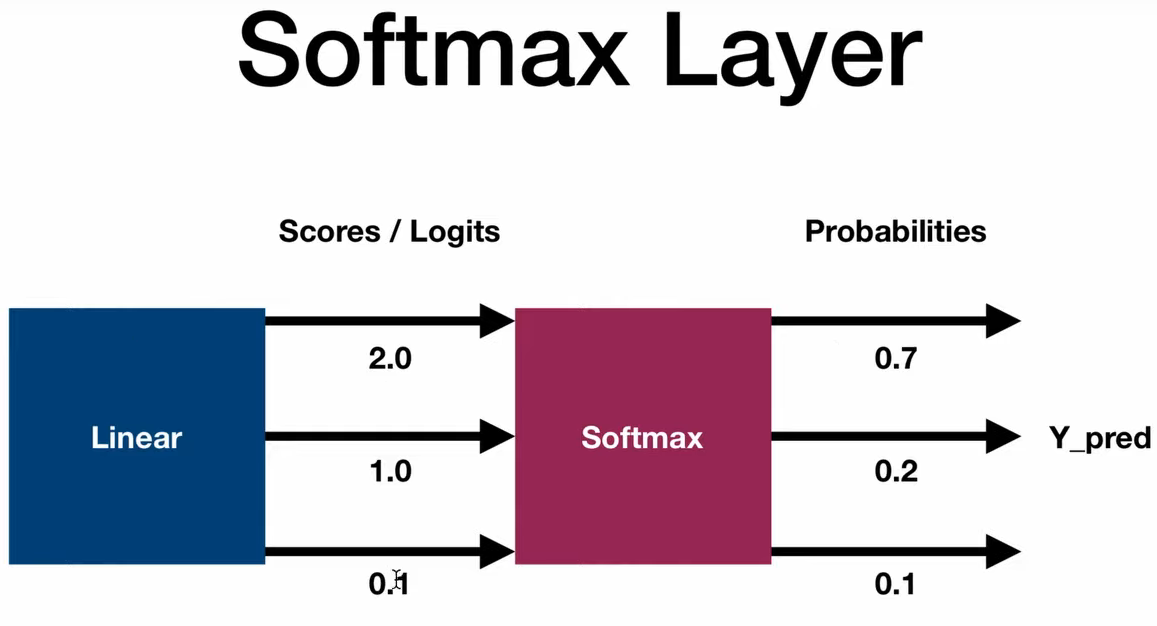

In [1]:
import torch
import torch.nn as nn
import numpy as np

In [2]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)
x = np.array([2.0, 1.0, 0.1])
outputs = softmax(x)
print("softmax numpy: ", outputs)

softmax numpy:  [0.65900114 0.24243297 0.09856589]


In [3]:
x = torch.tensor([2.0, 1.0, 0.1])
outputs = torch.softmax(x, dim=0)
print(outputs)

tensor([0.6590, 0.2424, 0.0986])


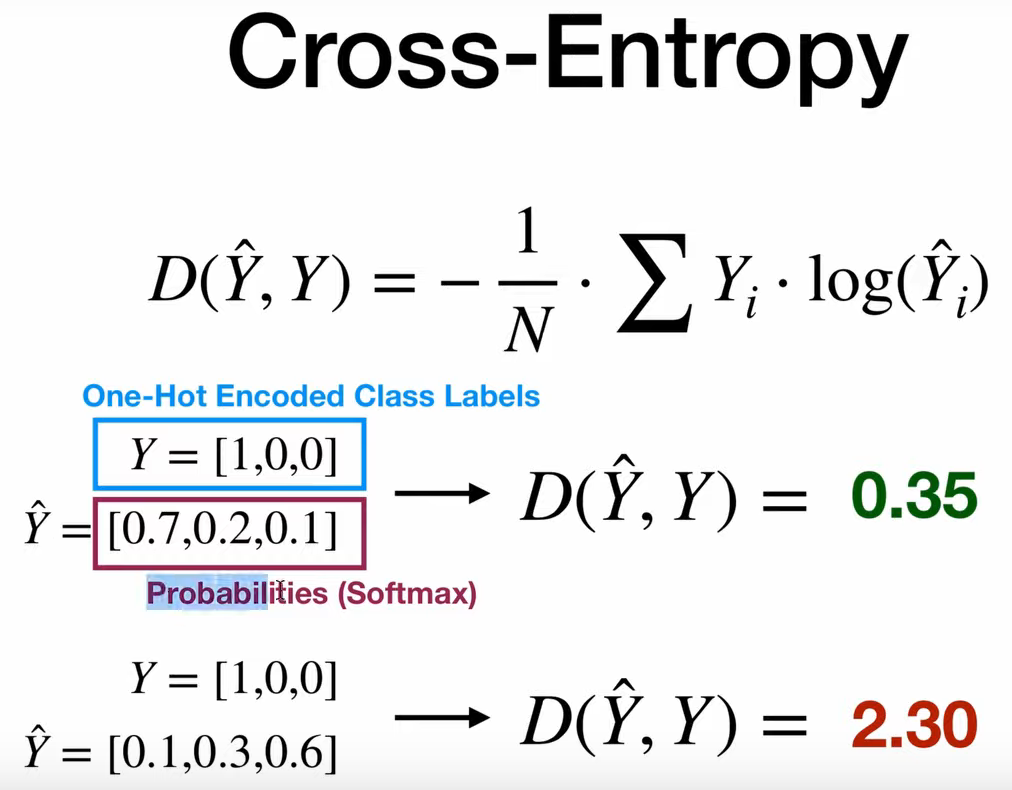

In [6]:
def cross_entropy(actual, predicted):
    loss = -np.sum(actual * np.log(predicted))
    return loss

Y = np.array([1, 0, 0])

Y_pred_good = np.array([0.7, 0.2, 0.1])
Y_pred_bad = np.array([0.1, 0.3, 0.6])
l1 = cross_entropy(Y, Y_pred_good)
l2 = cross_entropy(Y, Y_pred_bad)
print(f"loss1 numpy: {l1:.4f}")
print(f"loss2 numpy: {l2:.4f}")

loss1 numpy: 0.3567
loss2 numpy: 2.3026


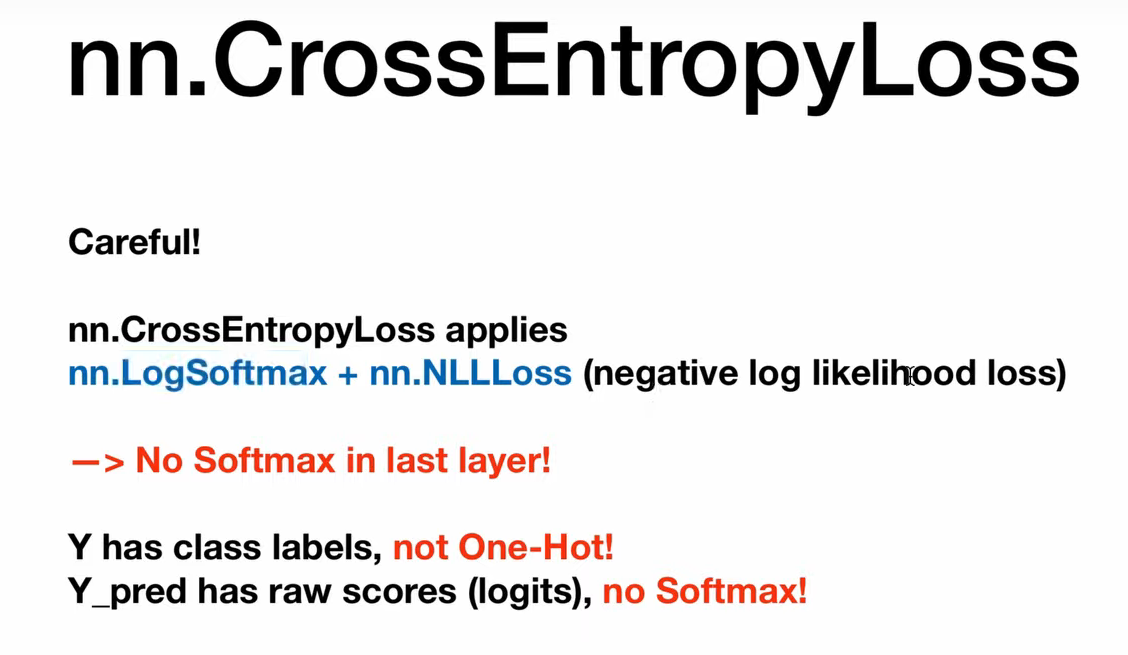

In [12]:
loss = nn.CrossEntropyLoss()

Y = torch.tensor([0])

# nsamples x nclasses = 1 x 3
Y_pred_good = torch.tensor([[2.0, 1.0, 0.1]]) # before softmax
Y_pred_bad = torch.tensor([[0.5, 2.0, 0.3]])

l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)

print(f"loss1 torch: {l1.item():.4f}")
print(f"loss2 torch: {l2.item():.4f}")

loss1 torch: 0.4170
loss2 torch: 1.8406


In [13]:
_, predictions1 = torch.max(Y_pred_good, 1)
_, predictions2 = torch.max(Y_pred_bad, 1)

print(predictions1)
print(predictions2)

tensor([0])
tensor([1])


Loss allows for multiple samples

In [15]:
loss = nn.CrossEntropyLoss()

Y = torch.tensor([2, 0, 1])

# nsamples x nclasses = 3 x 3
Y_pred_good = torch.tensor([[0.1, 1.0, 2.1],
                            [2.0, 1.0, 0.1],
                            [0.1, 3.0, 0.1]]) # before softmax

Y_pred_bad = torch.tensor([[2.1, 1.0, 0.1],
                           [0.1, 1.0, 2.1],
                           [0.1, 3.0, 0.1]])

l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)

print(f"loss1 torch: {l1.item():.4f}")
print(f"loss2 torch: {l2.item():.4f}")
_, predictions1 = torch.max(Y_pred_good, 1)
_, predictions2 = torch.max(Y_pred_bad, 1)

print(predictions1)
print(predictions2)

loss1 torch: 0.3018
loss2 torch: 1.6242
tensor([2, 0, 1])
tensor([0, 2, 1])


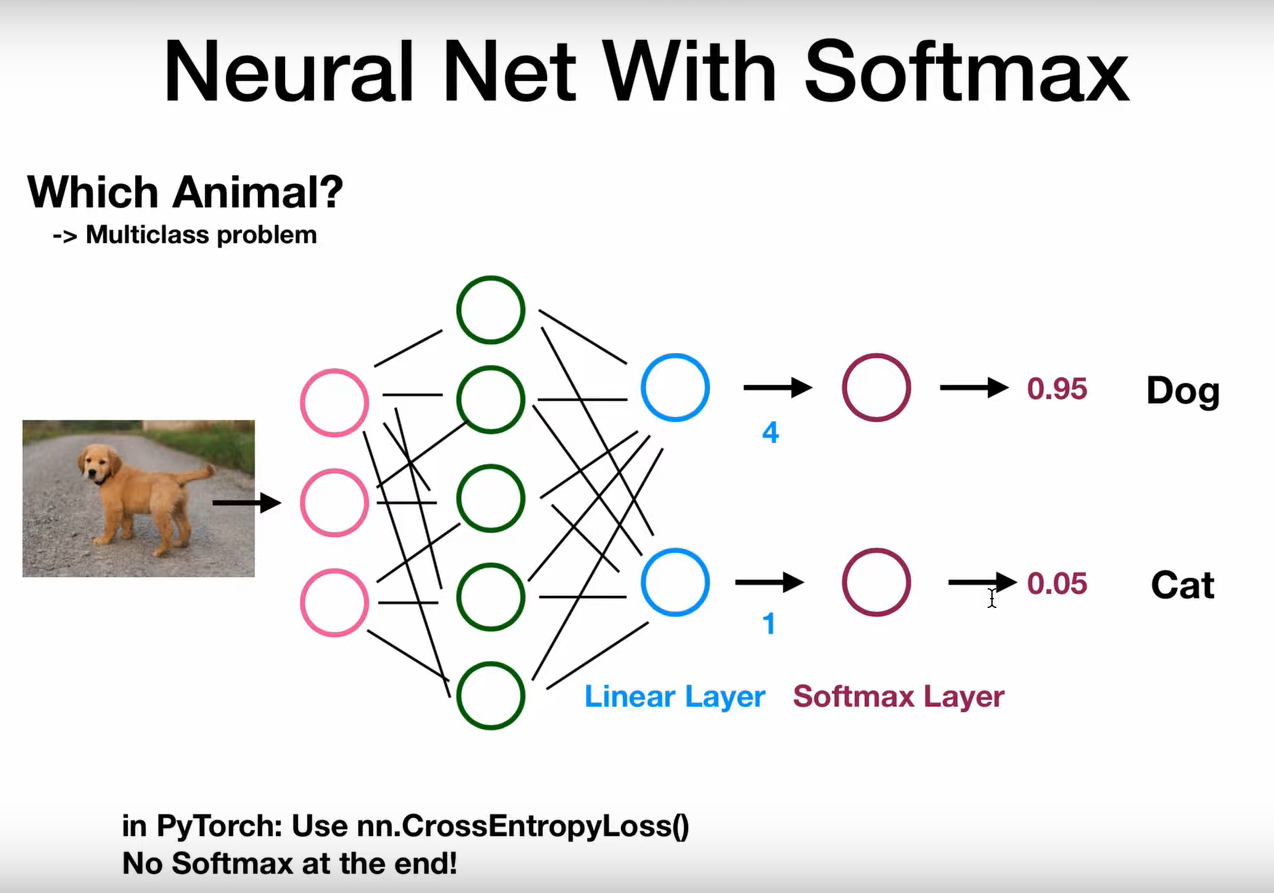
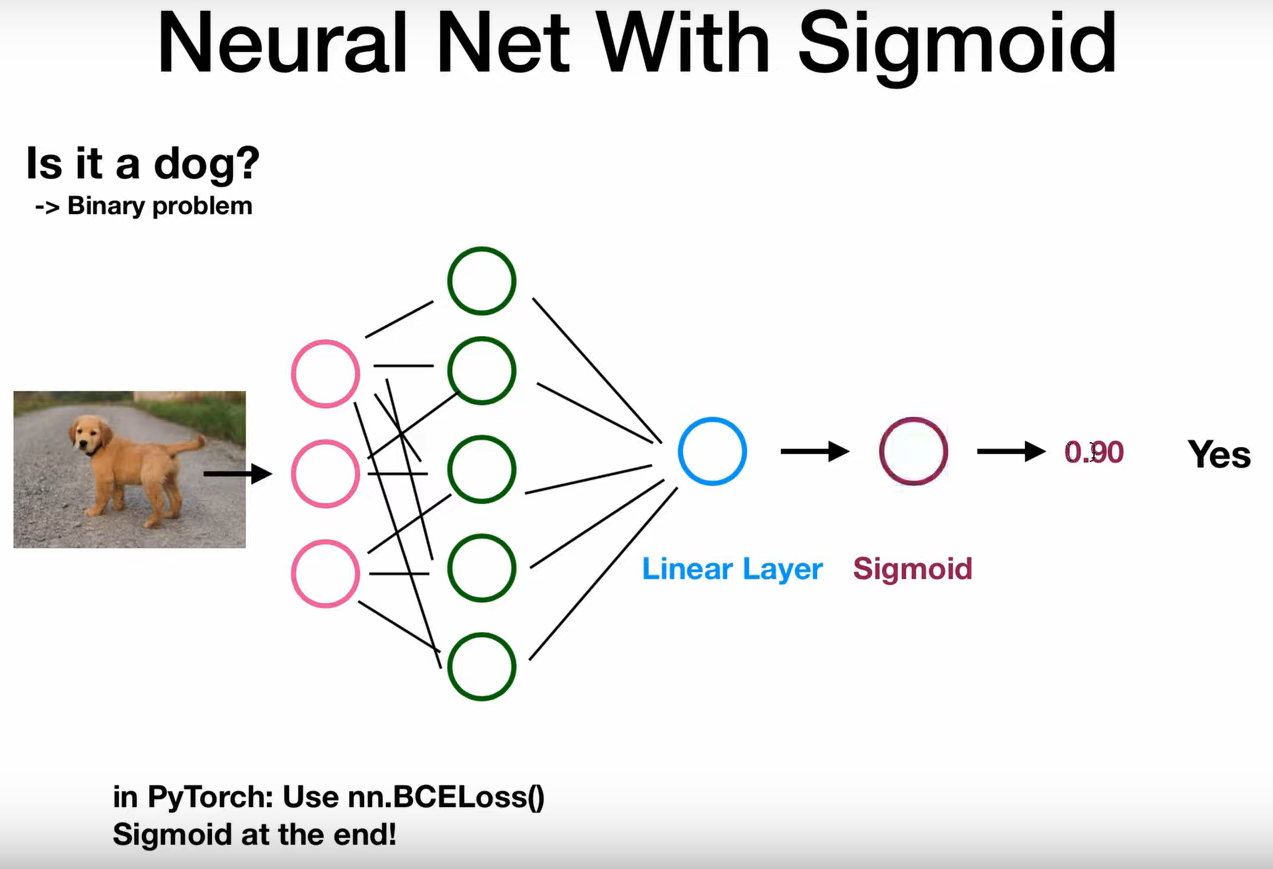